# Modelling via scikit-learn

This notebook performs model fitting and evaluating on hold out areas, using models from scikit-learn.

## Imports and Setup

In [20]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from math import sqrt
import pathlib
import os
from sklearn.externals import joblib

from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.reset_option('^display')

# ignore warnings
import logging
import warnings
logging.getLogger().setLevel(logging.ERROR)
warnings.filterwarnings("ignore")

import sys
sys.path.insert(0, '../utils')
import modelutils
from settings import *

## File Locations

In [2]:
dirs = [model_dir, scaler_dir, preds_dir]
for dir_ in dirs:
    with pathlib.Path(dir_) as path:
        if not path.exists():
            path.mkdir(parents=True, exist_ok=True)

## Load Data

In [3]:
# !gsutil cp gs://immap-wash-training/training/20200916_*.csv {data_dir}
df = pd.read_csv(data_dir + '20200916_dataset.csv')
df['population'] = df['population'].fillna(0)
df = df.dropna().reset_index(drop = True)
df.shape

(57036, 45)

## Fit, Predict and Evaluate Models Using 5-fold Cross Validation
Trains a random forest model to predict each of the 3 WASH indicators, setting random 20% of the data (whichever the area) as test data and everything else as training data. The train-test split is done for 5 different folds.

### Using Both Urban and Rural Dataset

In [4]:
# from sklearn.ensemble import RandomForestRegressor
# clf = RandomForestRegressor(random_state=42)

# res = modelutils.fit_with_randomsplit(df, clf, features, indicators, scale = True, n_splits = 5, prefix = 'all_250mv2')
res = pd.read_csv(data_dir + 'all_250mv2_randomsplit_results.csv')
modelutils.average_results(res, iterate_over = 'split_id', prefix = 'all_250mv2')

Access to water
correlation    0.772267
r2             0.596589
rmse           0.129155
dtype: float64
Access to toilet
correlation    0.731977
r2             0.535973
rmse           0.123311
dtype: float64
Access to sewage
correlation    0.804580
r2             0.647380
rmse           0.170705
dtype: float64


In [6]:
# clf = RandomForestRegressor(random_state=42)

# res = fit_with_randomsplit(df, clf, features, indicators, scale = True, n_splits = 5, prefix = 'all')
res = pd.read_csv(data_dir + 'all_randomsplit_results.csv')
modelutils.average_results(res, iterate_over = 'split_id', prefix = 'all')

Access to water
correlation    0.772267
r2             0.596589
rmse           0.129155
dtype: float64
Access to toilet
correlation    0.731977
r2             0.535973
rmse           0.123311
dtype: float64
Access to sewage
correlation    0.804580
r2             0.647380
rmse           0.170705
dtype: float64


In [10]:
pearsonr(res['y_true'], res['y_pred'])[0]**2

0.6215550756716262

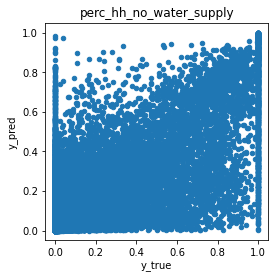

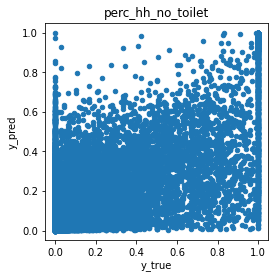

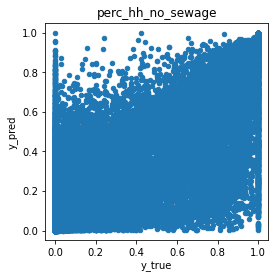

In [11]:
for indicator in indicators:
    (res.query(f"indicator == '{indicator}'")
     .plot(x = 'y_true', y = 'y_pred', figsize = (4,4), kind = 'scatter', title = indicator))